In [1]:
# 함수형 api를 사용해서 mnist에 잡음추가해서 분류

In [174]:
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train,y_train),(x_test,y_test) =  mnist.load_data()
x_train= x_train.reshape(-1, 28*28)
x_train = x_train / 255.

x_test= x_test.reshape(-1, 28*28)
x_test = x_test / 255.

#백색잡음 픽셀
x_train_with_noise = np.concatenate(
    [x_train,np.random.random((len(x_train),28*28))], axis = 1
)

# 0 픽셀
x_train_with_zero = np.concatenate(
    [x_train,np.zeros((len(x_train),28*28))], axis = 1
)


In [12]:
x_train.shape, x_train_with_noise.shape,x_train_with_zero.shape

((60000, 784), (60000, 1568), (60000, 1568))

In [14]:
# 모델을 구성
from tensorflow import keras
from tensorflow.keras import layers

In [15]:
def get_model():
    model = keras.Sequential(
        [
            layers.Dense(512,activation='relu'),
            layers.Dense(10,activation = 'softmax')
        ]
    )
    model.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

In [17]:
model = get_model()
history_noise = model.fit(
    x_train_with_noise,y_train,epochs=10,batch_size = 128,validation_split=0.2
)
model = get_model()
history_zeros = model.fit(
    x_train_with_zero,y_train,epochs=10,batch_size = 128,validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 19s 13ms/step - loss: 0.6070 - accuracy: 0.8161 - val_loss: 0.4009 - val_accuracy: 0.8609
Epoch 2/10
375/375 [==============================] - 3s 9ms/step - loss: 0.2482 - accuracy: 0.9237 - val_loss: 0.1853 - val_accuracy: 0.9443
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1617 - accuracy: 0.9503 - val_loss: 0.1477 - val_accuracy: 0.9548
Epoch 4/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1159 - accuracy: 0.9642 - val_loss: 0.1399 - val_accuracy: 0.9590
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0837 - accuracy: 0.9739 - val_loss: 0.1517 - val_accuracy: 0.9548
Epoch 6/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0631 - accuracy: 0.9796 - val_loss: 0.1232 - val_accuracy: 0.9666
Epoch 7/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0468 - accuracy: 0.9849 - val_loss: 0.1243 - val_accuracy: 0.9643
Epoc

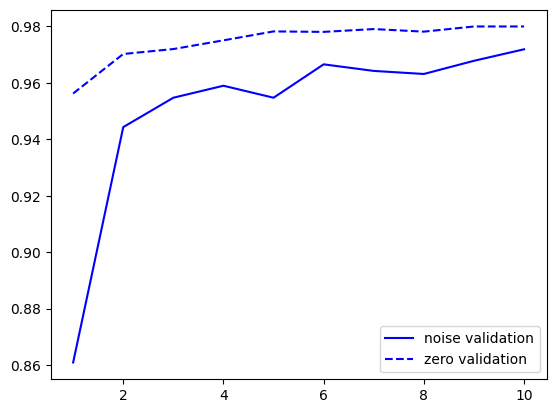

In [18]:
import matplotlib.pyplot as plt
val_acc_nosie = history_noise.history['val_accuracy']
val_acc_zero = history_zeros.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs,val_acc_nosie, 'b-',label='noise validation')
plt.plot(epochs,val_acc_zero, 'b--',label='zero validation')
plt.legend()
plt.show()

In [20]:
np.random.random((len(x_train),28*28)),x_train

(array([[0.67683529, 0.17409722, 0.83618944, ..., 0.26004253, 0.37414919,
         0.69139421],
        [0.7587431 , 0.00546683, 0.73652165, ..., 0.23129201, 0.55697204,
         0.41758191],
        [0.51186153, 0.70084   , 0.46828255, ..., 0.66746298, 0.50323052,
         0.49798855],
        ...,
        [0.93865429, 0.20067669, 0.69438351, ..., 0.95873058, 0.00291432,
         0.11372188],
        [0.38773572, 0.79491581, 0.57919592, ..., 0.4299661 , 0.12036812,
         0.0803848 ],
        [0.81580642, 0.03064016, 0.25623517, ..., 0.33828885, 0.10147642,
         0.27980892]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [21]:
# 데이터의 일반화
# 랜덤하게 섞은 데이터로 mnist를 훈련
# 성능 향상 : 적절한 학습률, 모델의 용량 늘리기(층을 깊게 쌓기)
# 규제 적용


In [24]:
#1. 랜덤하게 섞인 데이터
#2. 학습률을 적절하게 설정하기
(x_train,y_train),_ =  mnist.load_data()
x_train = x_train.reshape(-1,28*28)
x_train = x_train.astype("float32") / 255.
model = keras.Sequential(
    [
        layers.Dense(512,activation='relu')
        ,layers.Dense(10,activation='softmax')
    ]
)
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss = keras.losses.sparse_categorical_crossentropy,
              metrics=['acc']
             )
model.fit(x_train, y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 7ms/step - loss: 1297.5889 - acc: 0.4427 - val_loss: 1.9760 - val_acc: 0.3423
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 5.6449 - acc: 0.2850 - val_loss: 2.1960 - val_acc: 0.2810
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 2.6602 - acc: 0.2529 - val_loss: 2.1022 - val_acc: 0.2428
Epoch 4/10
375/375 [==============================] - 2s 7ms/step - loss: 2.5281 - acc: 0.2571 - val_loss: 2.3341 - val_acc: 0.3076
Epoch 5/10
375/375 [==============================] - 2s 7ms/step - loss: 2.7297 - acc: 0.2544 - val_loss: 1.9944 - val_acc: 0.2503
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 2.4823 - acc: 0.2768 - val_loss: 2.0728 - val_acc: 0.2636
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 2.4799 - acc: 0.2568 - val_loss: 3.0721 - val_acc: 0.2572
Epoch 8/10
375/375 [==============================] - 3s 7ms/step - loss:

In [31]:
# 적절한 학습률
(x_train,y_train),_ =  mnist.load_data()
x_train = x_train.reshape(-1,28*28)
x_train = x_train.astype("float32") / 255.

In [32]:
model = keras.Sequential(
    [
        layers.Dense(512,activation='relu')
        ,layers.Dense(10,activation='softmax')
    ]
)
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss = keras.losses.sparse_categorical_crossentropy,
              metrics=['acc']
             )
model.fit(x_train, y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 7ms/step - loss: 0.2865 - acc: 0.9168 - val_loss: 0.1489 - val_acc: 0.9567
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1186 - acc: 0.9643 - val_loss: 0.1113 - val_acc: 0.9687
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0780 - acc: 0.9764 - val_loss: 0.0940 - val_acc: 0.9708
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0560 - acc: 0.9831 - val_loss: 0.0901 - val_acc: 0.9728
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0417 - acc: 0.9876 - val_loss: 0.0831 - val_acc: 0.9769
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0311 - acc: 0.9909 - val_loss: 0.0900 - val_acc: 0.9761
Epoch 7/10
375/375 [==============================] - 2s 7ms/step - loss: 0.0244 - acc: 0.9929 - val_loss: 0.0817 - val_acc: 0.9787
Epoch 8/10
375/375 [==============================] - 2s 7ms/step - loss: 0.

In [33]:
# 용량 늘리기
(x_train,y_train),_ =  mnist.load_data()
x_train = x_train.reshape(-1,28*28)
x_train = x_train.astype("float32") / 255.
model = keras.Sequential(
    [
        layers.Dense(512,activation='relu')
        ,layers.Dense(96,activation='relu')
        ,layers.Dense(10,activation='softmax')
    ]
)
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss = keras.losses.sparse_categorical_crossentropy,
              metrics=['acc']
             )
model.fit(x_train, y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2696 - acc: 0.9183 - val_loss: 0.1239 - val_acc: 0.9614
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1014 - acc: 0.9690 - val_loss: 0.0861 - val_acc: 0.9728
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0637 - acc: 0.9806 - val_loss: 0.0825 - val_acc: 0.9762
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0455 - acc: 0.9862 - val_loss: 0.0829 - val_acc: 0.9762
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0325 - acc: 0.9900 - val_loss: 0.0828 - val_acc: 0.9782
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0250 - acc: 0.9925 - val_loss: 0.0889 - val_acc: 0.9781
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0184 - acc: 0.9941 - val_loss: 0.0985 - val_acc: 0.9778
Epoch 8/10
375/375 [==============================] - 3s 8ms/step - loss: 0.

In [35]:
from tensorflow.keras.datasets import imdb
(x_train,y_train),_  = imdb.load_data(num_words=10000)

In [45]:
for i in x_train:
    print(i)
    break

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [47]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)                  

(25000, 10000)

In [49]:
model = keras.Sequential(
    [
        layers.Dense(16,activation='relu')
        ,layers.Dense(16,activation='relu')
        ,layers.Dense(1,activation='sigmoid')
    ]
)
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss = keras.losses.binary_crossentropy,
              metrics=['acc']
             )
model.fit(train_data, y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 9s 17ms/step - loss: 0.3573 - acc: 0.8536 - val_loss: 0.2871 - val_acc: 0.8862
Epoch 2/10
157/157 [==============================] - 2s 12ms/step - loss: 0.2042 - acc: 0.9234 - val_loss: 0.2904 - val_acc: 0.8856
Epoch 3/10
157/157 [==============================] - 2s 11ms/step - loss: 0.1595 - acc: 0.9403 - val_loss: 0.3783 - val_acc: 0.8732
Epoch 4/10
157/157 [==============================] - 2s 12ms/step - loss: 0.1306 - acc: 0.9510 - val_loss: 0.3647 - val_acc: 0.8764
Epoch 5/10
157/157 [==============================] - 2s 13ms/step - loss: 0.1079 - acc: 0.9618 - val_loss: 0.4137 - val_acc: 0.8780
Epoch 6/10
157/157 [==============================] - 2s 13ms/step - loss: 0.0894 - acc: 0.9674 - val_loss: 0.4130 - val_acc: 0.8790
Epoch 7/10
157/157 [==============================] - 2s 12ms/step - loss: 0.0738 - acc: 0.9744 - val_loss: 0.5008 - val_acc: 0.8748
Epoch 8/10
157/157 [==============================] - 2s 12ms/step - 

In [50]:
# 출력이 작은 네트웍
model = keras.Sequential(
    [
        layers.Dense(4,activation='relu')
        ,layers.Dense(4,activation='relu')
        ,layers.Dense(1,activation='sigmoid')
    ]
)
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss = keras.losses.binary_crossentropy,
              metrics=['acc']
             )
model.fit(train_data, y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 47s 19ms/step - loss: 0.5626 - acc: 0.7467 - val_loss: 0.4954 - val_acc: 0.8014
Epoch 2/10
157/157 [==============================] - 2s 12ms/step - loss: 0.4206 - acc: 0.8906 - val_loss: 0.4150 - val_acc: 0.8794
Epoch 3/10
157/157 [==============================] - 2s 11ms/step - loss: 0.3406 - acc: 0.9217 - val_loss: 0.3811 - val_acc: 0.8820
Epoch 4/10
157/157 [==============================] - 2s 11ms/step - loss: 0.2763 - acc: 0.9359 - val_loss: 0.3706 - val_acc: 0.8782
Epoch 5/10
157/157 [==============================] - 2s 12ms/step - loss: 0.2242 - acc: 0.9444 - val_loss: 0.4263 - val_acc: 0.8706
Epoch 6/10
157/157 [==============================] - 2s 11ms/step - loss: 0.1816 - acc: 0.9541 - val_loss: 0.4179 - val_acc: 0.8738
Epoch 7/10
157/157 [==============================] - 2s 11ms/step - loss: 0.1477 - acc: 0.9605 - val_loss: 0.4081 - val_acc: 0.8742
Epoch 8/10
157/157 [==============================] - 2s 11ms/step -

In [52]:
# 출력을 굉장치 크게 작은 네트웍
model = keras.Sequential(
    [
        layers.Dense(512,activation='relu')
        ,layers.Dense(512,activation='relu')
        ,layers.Dense(1,activation='sigmoid')
    ]
)
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss = keras.losses.binary_crossentropy,
              metrics=['acc']
             )
model.fit(train_data, y_train,epochs=20,batch_size=128,validation_split=0.2)

Epoch 1/20
157/157 [==============================] - 13s 47ms/step - loss: 0.3697 - acc: 0.8393 - val_loss: 0.2997 - val_acc: 0.8766
Epoch 2/20
157/157 [==============================] - 6s 40ms/step - loss: 0.1715 - acc: 0.9360 - val_loss: 0.3081 - val_acc: 0.8910
Epoch 3/20
157/157 [==============================] - 6s 40ms/step - loss: 0.0736 - acc: 0.9785 - val_loss: 0.6178 - val_acc: 0.8750
Epoch 4/20
157/157 [==============================] - 6s 40ms/step - loss: 0.0402 - acc: 0.9918 - val_loss: 1.1436 - val_acc: 0.8302
Epoch 5/20
157/157 [==============================] - 6s 40ms/step - loss: 0.0114 - acc: 0.9976 - val_loss: 1.0608 - val_acc: 0.8826
Epoch 6/20
157/157 [==============================] - 6s 40ms/step - loss: 0.0141 - acc: 0.9979 - val_loss: 1.3983 - val_acc: 0.8834
Epoch 7/20
157/157 [==============================] - 7s 42ms/step - loss: 0.0173 - acc: 0.9973 - val_loss: 1.1541 - val_acc: 0.8798
Epoch 8/20
157/157 [==============================] - 6s 40ms/step -

In [7]:
# L2 가중치 적용
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb

from tensorflow.keras.datasets import imdb
(x_train, y_train), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(x_train)         




from tensorflow.keras import regularizers
model = keras.Sequential(
    [
        layers.Dense(512,activation='relu',kernel_regularizer= regularizers.l2(0.002))
        ,layers.Dense(512,activation='relu',kernel_regularizer= regularizers.l2(0.002))
        ,layers.Dense(1,activation='sigmoid')
    ]
)
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss = keras.losses.binary_crossentropy,
              metrics=['acc']
             )
model.fit(x_train, y_train,epochs=20,batch_size=128,validation_split=0.2)

Epoch 1/20
157/157 [==============================] - 17s 54ms/step - loss: 0.7700 - acc: 0.8278 - val_loss: 0.4114 - val_acc: 0.8780
Epoch 2/20
157/157 [==============================] - 8s 51ms/step - loss: 0.3882 - acc: 0.8862 - val_loss: 0.4010 - val_acc: 0.8750
Epoch 3/20
157/157 [==============================] - 8s 50ms/step - loss: 0.3334 - acc: 0.9020 - val_loss: 0.3652 - val_acc: 0.8870
Epoch 4/20
157/157 [==============================] - 8s 49ms/step - loss: 0.2939 - acc: 0.9147 - val_loss: 0.3557 - val_acc: 0.8858
Epoch 5/20
157/157 [==============================] - 8s 49ms/step - loss: 0.2726 - acc: 0.9199 - val_loss: 0.3621 - val_acc: 0.8834
Epoch 6/20
157/157 [==============================] - 8s 49ms/step - loss: 0.2453 - acc: 0.9305 - val_loss: 0.3742 - val_acc: 0.8798
Epoch 7/20
157/157 [==============================] - 8s 49ms/step - loss: 0.2254 - acc: 0.9415 - val_loss: 0.3727 - val_acc: 0.8804
Epoch 8/20
157/157 [==============================] - 8s 49ms/step -

In [8]:
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.002)

In [9]:
# dropout
model = keras.Sequential(
    [
        layers.Dense(512,activation='relu',kernel_regularizer= regularizers.l2(0.002))
        ,layers.Dropout(0.5)
        ,layers.Dense(512,activation='relu',kernel_regularizer= regularizers.l2(0.002))
        ,layers.Dropout(0.5)
        ,layers.Dense(1,activation='sigmoid')
    ]
)
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss = keras.losses.binary_crossentropy,
              metrics=['acc']
             )
model.fit(x_train, y_train,epochs=20,batch_size=128,validation_split=0.2)

Epoch 1/20
157/157 [==============================] - 93s 570ms/step - loss: 0.8734 - acc: 0.8191 - val_loss: 0.4550 - val_acc: 0.8834
Epoch 2/20
157/157 [==============================] - 9s 60ms/step - loss: 0.4486 - acc: 0.8757 - val_loss: 0.4595 - val_acc: 0.8574
Epoch 3/20
157/157 [==============================] - 8s 50ms/step - loss: 0.4008 - acc: 0.8885 - val_loss: 0.5477 - val_acc: 0.8268
Epoch 4/20
157/157 [==============================] - 8s 50ms/step - loss: 0.3827 - acc: 0.8928 - val_loss: 0.4129 - val_acc: 0.8748
Epoch 5/20
157/157 [==============================] - 8s 49ms/step - loss: 0.3676 - acc: 0.8965 - val_loss: 0.3983 - val_acc: 0.8824
Epoch 6/20
157/157 [==============================] - 8s 51ms/step - loss: 0.3545 - acc: 0.9012 - val_loss: 0.4207 - val_acc: 0.8706
Epoch 7/20
157/157 [==============================] - 8s 52ms/step - loss: 0.3454 - acc: 0.9063 - val_loss: 0.4624 - val_acc: 0.8572
Epoch 8/20
157/157 [==============================] - 9s 56ms/step 

In [11]:
# 케라스 모델을 만드는 여러가지 방법
from tensorflow import keras
from tensorflow.keras import layers

In [12]:
model = keras.Sequential([
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [37]:
# 점진적으로 만들기
model = keras.Sequential(name='teste')
model.add(layers.Dense(64,activation='relu', name = 'layer1'))
model.add(layers.Dense(10,activation='softmax',name = 'layer2'))

In [38]:
#가중치를만들기 위해 모델을 호출
model.build(input_shape=(None,3))

In [39]:
model.summary()

Model: "teste"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 64)                256       
_________________________________________________________________
layer2 (Dense)               (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [40]:
# 데이터 입력 크기 미리 정하기
model = keras.Sequential()
model.add(keras.Input(shape = (3,)))
model.add(layers.Dense(64,activation='relu'))
model.summary()
          

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 64)                256       
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 64)                256       
_________________________________________________________________
dense_26 (Dense)             (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [43]:
# 함수형 API
inputs = keras.Input(shape=(3,))
features = layers.Dense(64,activation='relu')(inputs)
outputs = layers.Dense(10,activation='relu')(features)
model = keras.Model(inputs = inputs, outputs = outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_29 (Dense)             (None, 64)                256       
_________________________________________________________________
dense_30 (Dense)             (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [46]:
# 함수형 API
inputs = keras.Input(shape=(3,))
x = layers.Dense(64,activation='relu')(inputs)
x = layers.Dense(10,activation='relu')(x)
model = keras.Model(inputs = inputs, outputs = x)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_33 (Dense)             (None, 64)                256       
_________________________________________________________________
dense_34 (Dense)             (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [48]:
# 다중 입력, 다중 출력
vocabulary_size = 10000
num_tags = 100
num_dpartments = 4
title = keras.Input(shape=(vocabulary_size,),name='title')
text_body = keras.Input(shape=(vocabulary_size,),name='text_body')
tags = keras.Input(shape=(num_tags,),name='tags')

features = layers.Concatenate()([title,text_body,tags])
features = layers.Dense(64,activation='relu')(features)

priority = layers.Dense(1, activation='sigmoid',name='priority')(features)
department = layers.Dense(num_dpartments, activation='softmax',name='department')(features)

model = keras.Model(inputs = [title,text_body,tags],outputs = [priority,department])
model.summary()


Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title (InputLayer)              [(None, 10000)]      0                                            
__________________________________________________________________________________________________
text_body (InputLayer)          [(None, 10000)]      0                                            
__________________________________________________________________________________________________
tags (InputLayer)               [(None, 100)]        0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 20100)        0           title[0][0]                      
                                                                 text_body[0][0]            

In [49]:
# 훈련
num_samples = 1280
title_data = np.random.randint(0,2,size = (num_samples, vocabulary_size))
text_body_data =np.random.randint(0,2,size = (num_samples,vocabulary_size  ))
tag_data = np.random.randint(0,2,size = (num_samples, num_tags ))

priority_data = np.random.random(size=(num_samples,1))
department_data = np.random.randint(0,2,size=(num_samples, num_dpartments))

In [50]:
model.compile(optimizer='rmsprop', loss = ['mean_squared_error','categorical_crossentropy'], 
              metrics=[['mean_absolute_error'],['accuracy']])
model.fit( [title_data,text_body_data,tag_data], [priority_data,department_data], epochs=1)              

40/40 [==============================] - 2s 15ms/step - loss: 34.7541 - priority_loss: 0.3390 - department_loss: 34.4151 - priority_mean_absolute_error: 0.5071 - department_accuracy: 0.2156


In [51]:
model.evaluate([title_data,text_body_data,tag_data], [priority_data,department_data])

40/40 [==============================] - 1s 6ms/step - loss: 38.0712 - priority_loss: 0.3461 - department_loss: 37.7251 - priority_mean_absolute_error: 0.5133 - department_accuracy: 0.5680


[38.07124328613281,
 0.3460938334465027,
 37.72514724731445,
 0.5133138298988342,
 0.5679687261581421]

In [52]:
priority_predict, department_predict =  model.predict([title_data,text_body_data,tag_data])

In [53]:
model.compile(optimizer='rmsprop', loss = {'priority':'mean_squared_error','department':'categorical_crossentropy'}, 
              metrics={'priority':['mean_absolute_error'],'department':['accuracy']}
             )
model.fit( {'title':title_data,'text_body':text_body_data,'tags':tag_data}, {'priority':priority_data,'department':department_data}, epochs=1)     
model.evaluate({'title':title_data,'text_body':text_body_data,'tags':tag_data}, {'priority':priority_data,'department':department_data})
priority_predict, department_predict =  model.predict({'title':title_data,'text_body':text_body_data,'tags':tag_data})

40/40 [==============================] - 1s 8ms/step - loss: 31.9914 - priority_loss: 0.3461 - department_loss: 31.6453 - priority_mean_absolute_error: 0.5133 - department_accuracy: 0.1172


In [55]:
!pip install pydot

  Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)


In [57]:
!pip install graphviz 

  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)


In [58]:
keras.utils.plot_model(model,'test.png')

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


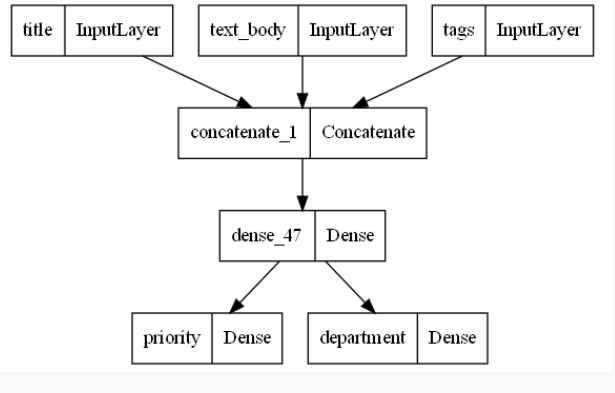

In [61]:
# 서브클래싱 모델로 구성하기
class CustomerModel(keras.Model):
    def __init__(self, num_departments):
        super().__init__()
        # super(CustomerModel, self).__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation='relu')
        self.prioroty_scorer = layers.Dense(1,activation='sigmoid')
        self.department_classifier = layers.Dense(num_departments, activation='softmax')
    def call(self, inputs): # inputs type is dictionary
        title = inputs['title']
        text_body = inputs['text_body']
        tags = inputs['tags']
        
        features = self.concat_layer([title,text_body,tags])
        features = self.mixing_layer(features)
        priority =  self.prioroty_scorer(features)
        department =  self.department_classifier(features)
        return priority, department        

In [62]:
model = CustomerModel(num_departments = 4)
priority, department = model({
    'title':title_data,
    'text_body':text_body_data,
    'tags': tag_data
})

In [64]:
model.summary()

Model: "customer_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
concatenate_3 (Concatenate)  multiple                  0         
_________________________________________________________________
dense_37 (Dense)             multiple                  1286464   
_________________________________________________________________
dense_38 (Dense)             multiple                  65        
_________________________________________________________________
dense_39 (Dense)             multiple                  260       
Total params: 1,286,789
Trainable params: 1,286,789
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.compile(optimizer='rmsprop', loss = ['mean_squared_error','categorical_crossentropy'], 
              metrics=[['mean_absolute_error'],['accuracy']]
             )
model.fit( 
            {
                'title':title_data
                 ,'text_body':text_body_data
                 ,'tags':tag_data
            }, 
            [priority_data,department_data]
    , epochs=1)     

model.evaluate({'title':title_data,'text_body':text_body_data,'tags':tag_data}, [priority_data,department_data])
priority_predict, department_predict =  model.predict({'title':title_data,'text_body':text_body_data,'tags':tag_data})

40/40 [==============================] - 1s 9ms/step - loss: 37.6546 - output_1_loss: 0.3195 - output_2_loss: 37.3351 - output_1_mean_absolute_error: 0.4867 - output_2_accuracy: 0.0703


In [68]:
# 서브클래싱 모델을 포함해서 함수형 모델
class Classifier(keras.Model):
    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = 'sigmoid'
        else:
            num_units = num_classes
            activation = 'softmax'
        self.dense = layers.Dense(num_units, activation=activation)
    def call(self, inputs):
        return self.dense(inputs)    

In [69]:
inputs = keras.Input(shape=(3,))
features = layers.Dense(64,activation='relu')(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [77]:
# 함수형 모델 API 을 포함하는 서브클래스 모델
inputs = keras.Input(shape=(64,),name='inputs1')
outputs = layers.Dense(1,activation='sigmoid',name='dense1')(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)
binary_classifier.summary()
        

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs1 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense1 (Dense)               (None, 1)                 65        
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [78]:
class CustModel(keras.Model):
    def __init__(self, num_class = 2):
        super().__init__()
        self.dense = layers.Dense(64,activation='relu', name='dense2')
        self.classifier = binary_classifier
    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)
model = CustModel()  

In [79]:
model.build(input_shape=(None,3))
model.summary()

Model: "cust_model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense2 (Dense)               multiple                  256       
_________________________________________________________________
model_10 (Functional)        (None, 1)                 65        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [80]:
# 신경망의 기본 아키텍처에 사용되는 도구들
# 기본 워크플로우 compile() , fit(), evaluate(), predict()

In [9]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
def get_mnist_model():
    # 함수형 API로 모델을  dense:512 dropout:0.5 dense:10 
    inputs = keras.Input(shape=(28*28,)) 
    features = layers.Dense(512,activation='relu')(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10,activation='softmax')(features)
    model = keras.Model(inputs=inputs,outputs=outputs)
    return model

In [85]:
# 데이터.. train, test
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

In [86]:
# 모델, 
model = get_mnist_model()
# 기본 워크플로우 적용
model.compile(optimizer='adam',loss = keras.losses.sparse_categorical_crossentropy,metrics=['acc'])
model.fit(x_train,y_train,epochs=3,validation_split=0.2)
print(model.evaluate(x_test,y_test))
model.predict(x_test)

Epoch 1/3
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2957 - acc: 0.9112 - val_loss: 0.1476 - val_acc: 0.9557
Epoch 2/3
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1504 - acc: 0.9549 - val_loss: 0.1021 - val_acc: 0.9682
Epoch 3/3
313/313 [==============================] - 1s 4ms/step - loss: 0.0827 - acc: 0.9747
[0.08265644311904907, 0.9746999740600586]


array([[6.8339551e-07, 5.1671485e-08, 4.2504412e-06, ..., 9.9993002e-01,
        4.5224354e-08, 1.6716634e-06],
       [1.4598739e-06, 1.3285715e-03, 9.9851722e-01, ..., 4.2965159e-10,
        1.2568103e-05, 1.4839463e-11],
       [1.0384670e-06, 9.9843365e-01, 1.5117475e-04, ..., 1.1334918e-03,
        9.8121687e-05, 1.8544836e-06],
       ...,
       [4.3809560e-11, 4.1967372e-08, 1.7190480e-09, ..., 5.4075695e-06,
        5.3907165e-06, 3.8209415e-05],
       [4.2386006e-09, 1.7247677e-08, 5.9313461e-12, ..., 4.2825232e-09,
        3.3221970e-04, 9.6902086e-10],
       [8.3705700e-08, 2.6345293e-12, 1.9224909e-07, ..., 5.1347051e-13,
        1.4807511e-09, 4.0092495e-11]], dtype=float32)

In [87]:
model.predict(x_test).argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [93]:
# 상용자 정의 지표를 만들어서 평가해 보기
import tensorflow as tf
class RootMeanSquaredError(keras.metrics.Metric):
    def __init__(self,name='rmse',**kwargs):
        super().__init__(name = name,**kwargs )
        self.mse_sum =  self.add_weight(name = 'mse_sum', initializer='zeros')
        self.total_samples = self.add_weight(name = 'total_samples', initializer='zeros', dtype='int32')
    def update_state(self, y_true, y_pred, sample_weight = None):
        y_true = tf.one_hot(y_true,depth = tf.shape(y_pred)[1])
        mse = tf.reduce_sum((y_true-y_pred)**2)
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)
    def result(self):
        return tf.sqrt(self.mse_sum / float(self.total_samples))  # 타입다르면 에러
    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)
        

In [94]:
model = get_mnist_model()
# 기본 워크플로우 적용
model.compile(optimizer='adam',loss = keras.losses.sparse_categorical_crossentropy,metrics=['acc', RootMeanSquaredError()])
model.fit(x_train,y_train,epochs=3,validation_split=0.2)
model.evaluate(x_test,y_test)
# model.predict(x_test)

Epoch 1/3
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2995 - acc: 0.9101 - rmse: 7.1227 - val_loss: 0.1291 - val_acc: 0.9632 - val_rmse: 7.3359
Epoch 2/3
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1475 - acc: 0.9550 - rmse: 7.3049 - val_loss: 0.1026 - val_acc: 0.9676 - val_rmse: 7.3840
Epoch 3/3
313/313 [==============================] - 1s 3ms/step - loss: 0.0810 - acc: 0.9749 - rmse: 7.4015


[0.08101657778024673, 0.9749000072479248, 7.401517391204834]

In [102]:
# 콜벡함수.... EarylyStopping, 
# ModelCheckPoint
callback_list = [
    keras.callbacks.EarlyStopping(
        monitor='val_accuracy',patience=2, mode='max'
    ),
    keras.callbacks.ModelCheckpoint(
        filepath='checkpoint.keras',
        save_best_only=True,
        monitor = 'val_accuracy',
        mode='max'
    )    
]
model = get_mnist_model()
model.compile(optimizer='adam',loss = keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])
model.fit(x_train,y_train,epochs=20,validation_split=0.2, callbacks=callback_list)

Epoch 1/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2951 - accuracy: 0.9120 - val_loss: 0.1332 - val_accuracy: 0.9614
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1512 - accuracy: 0.9549 - val_loss: 0.1055 - val_accuracy: 0.9682
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1170 - accuracy: 0.9642 - val_loss: 0.0964 - val_accuracy: 0.9717
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0987 - accuracy: 0.9686 - val_loss: 0.0860 - val_accuracy: 0.9746
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0870 - accuracy: 0.9722 - val_loss: 0.0801 - val_accuracy: 0.9776
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0762 - accuracy: 0.9759 - val_loss: 0.0770 - val_accuracy: 0.9781
Epoch 7/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0696 - accuracy: 0.9776 - val_loss: 0.0781 - val_accuracy

In [103]:
best_model = tf.keras.models.load_model('checkpoint.keras')

In [104]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0723 - accuracy: 0.9817


[0.0722610130906105, 0.9817000031471252]

In [105]:
best_model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0686 - accuracy: 0.9825


[0.06855016201734543, 0.9825000166893005]

In [1]:
# 사용자 정의 콜백 만들기
# Callback 클래스를 상속받아서 생성

In [4]:
import matplotlib.pyplot as plt
import tensorflow.kerasras as keras

In [5]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []
    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get('loss'))
    def on_epoch_end(self, epoch,logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses, label = 'Training loss for each batch')
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_epoch_{epoch}")
        self.per_batch_losses = []                 

Epoch 1/10
1500/1500 [==============================] - 15s 5ms/step - loss: 0.2963 - acc: 0.9121 - val_loss: 0.1321 - val_acc: 0.9616
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1484 - acc: 0.9550 - val_loss: 0.1031 - val_acc: 0.9705
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1141 - acc: 0.9649 - val_loss: 0.0849 - val_acc: 0.9734
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0945 - acc: 0.9701 - val_loss: 0.0851 - val_acc: 0.9748
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0840 - acc: 0.9739 - val_loss: 0.0839 - val_acc: 0.9768
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0771 - acc: 0.9756 - val_loss: 0.0832 - val_acc: 0.9769
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0675 - acc: 0.9786 - val_loss: 0.0783 - val_acc: 0.9773
Epoch 8/10
1500/1500 [==============================] - 6s 4m

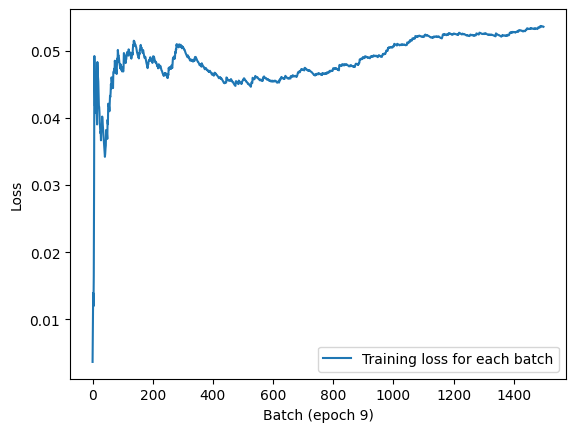

In [13]:
model = get_mnist_model()
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['acc'])
model.fit(x_train,y_train,epochs=10, callbacks=[LossHistory()], validation_split=0.2)


In [14]:
# 텐서보드를 사용한 시각화
model = get_mnist_model()
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['acc'])
tensorboard = keras.callbacks.TensorBoard(
    log_dir = './tb_logs'
)
model.fit(x_train,y_train,epochs=10, callbacks=[tensorboard], validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2973 - acc: 0.9109 - val_loss: 0.1437 - val_acc: 0.9572
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1505 - acc: 0.9548 - val_loss: 0.1070 - val_acc: 0.9692
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1148 - acc: 0.9646 - val_loss: 0.0905 - val_acc: 0.9724
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0966 - acc: 0.9683 - val_loss: 0.0846 - val_acc: 0.9743
Epoch 5/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0842 - acc: 0.9731 - val_loss: 0.0863 - val_acc: 0.9749
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0751 - acc: 0.9756 - val_loss: 0.0792 - val_acc: 0.9764
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0684 - acc: 0.9777 - val_loss: 0.0788 - val_acc: 0.9773
Epoch 8/10
1500/1500 [==============================] - 7s 5

In [15]:
%load_ext tensorboard
%tensorboard --logdir ./tb_logs

In [16]:
# 측정지표 확인하기

In [101]:
# 저수준 API 로 사용해 보기  훈련
metrics = keras.metrics.SparseCategoricalAccuracy()
target = [0,1,3]
predictions = [
    [1,0,0],[0,1,0],[0,0,1]
]
metrics.update_state(target,predictions)
print(f"{metrics.result():.2f}")
metrics.name

0.67


'sparse_categorical_accuracy'

In [102]:
# 평가용 저수준 API
values = [0,1,2,3,4]
mean_trace =  keras.metrics.Mean()
for val in values:
    mean_trace.update_state(val)    
print(f"{mean_trace.result():.2f}") 

2.00


In [103]:
# 훈련 스텝함수

In [104]:
model = get_mnist_model()
loss_fn =  keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.Adam()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

In [105]:
# 단계별 훈련 지표 
import tensorflow as tf
def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions =  model(inputs,training=True)
        loss = loss_fn(targets,predictions)
    gradients =  tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients,model.trainable_weights))
    
    logs = {}
    for metric in metrics:
        metric.update_state(targets,predictions)
        logs[metric.name] = metric.result()
    
    loss_tracking_metric.update_state(loss)
    logs['loss'] = loss_tracking_metric.result()
    return logs    

In [106]:
# reset
def reset_metric():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

In [107]:
# step 별로 훈련하기

In [108]:
x_train.shape,y_train.shape

((60000, 784), (60000,))

In [109]:
train_dataset =  tf.data.Dataset.from_tensor_slices( (x_train,y_train) )

In [110]:
train_dataset = train_dataset.batch(32)

In [111]:
train_dataset

<BatchDataset shapes: ((None, 784), (None,)), types: (tf.float64, tf.uint8)>

In [112]:
count = 0
for xb,yb in  train_dataset:
    count += 1
    # print(xb.shape, yb.shape)
print(count)    
    

1875


In [114]:
help(tf.keras.Model.call)

Help on function call in module tensorflow.python.keras.engine.training:

call(self, inputs, training=None, mask=None)
    Calls the model on new inputs.
    
    In this case `call` just reapplies
    all ops in the graph to the new inputs
    (e.g. build a new computational graph from the provided inputs).
    
    Note: This method should not be called directly. It is only meant to be
    overridden when subclassing `tf.keras.Model`.
    To call a model on an input, always use the `__call__` method,
    i.e. `model(inputs)`, which relies on the underlying `call` method.
    
    Args:
        inputs: A tensor or list of tensors.
        training: Boolean or boolean scalar tensor, indicating whether to run
          the `Network` in training mode or inference mode.
        mask: A mask or list of masks. A mask can be
            either a tensor or None (no mask).
    
    Returns:
        A tensor if there is a single output, or
        a list of tensors if there are more than one ou

In [ ]:

epochs = 3
for epoch in range(epochs):
    reset_metric()
    for x_train_batch,y_train_batch in train_dataset:
        # print(x_train_batch.shape, y_train_batch.shape)
        logs = train_step(x_train_batch,y_train_batch)
    print(f"{epoch} 번째 결과 ")
    for key, value in  logs.items():
        print(f"{key} : {value:.4f}")

In [115]:
# 단계별 평가 지표 

In [122]:
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)
    # 기울기를 계산하고 optimizer통해 오류 역전파알고리즘으로 적용하는 과정 불 필요
    logs = {}
    for metric in metrics:
        metric.update_state(targets,predictions)
        logs['val_'+metric.name] = metric.result()
    
    loss_tracking_metric.update_state(loss)
    logs['val_loss'] = loss_tracking_metric.result()
    return logs 

In [129]:
test_dataset =  tf.data.Dataset.from_tensor_slices( (x_test,y_test) )
test_dataset = test_dataset.batch(32)
reset_metric()
for x_test_batch,y_test_batch in test_dataset:    
    logs = test_step(x_test_batch,y_test_batch)
print(f"평가 결과 ")
for key, value in  logs.items():
    print(f"{key} : {value:.4f}")
    

평가 결과 
val_sparse_categorical_accuracy : 0.9796
val_loss : 0.0693


In [133]:
import tensorflow as tf
# 훈련스텝 성능 향상
# @tf.function --> 단지 이것만 함수위에 정의하면 텐서플로우내에서 로직을 분할해서 최적화 를 자동으로 실행
@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)
    # 기울기를 계산하고 optimizer통해 오류 역전파알고리즘으로 적용하는 과정 불 필요
    logs = {}
    for metric in metrics:
        metric.update_state(targets,predictions)
        logs['val_'+metric.name] = metric.result()
    
    loss_tracking_metric.update_state(loss)
    logs['val_loss'] = loss_tracking_metric.result()
    return logs 

test_dataset =  tf.data.Dataset.from_tensor_slices( (x_test,y_test) )
test_dataset = test_dataset.batch(32)
reset_metric()
for x_test_batch,y_test_batch in test_dataset:    
    logs = test_step(x_test_batch,y_test_batch)
print(f"평가 결과 ")
for key, value in  logs.items():
    print(f"{key} : {value:.4f}")

평가 결과 
val_sparse_categorical_accuracy : 0.9783
val_loss : 0.0725


In [134]:
# fit을 이용한 훈련 루프 설계하기

In [182]:
# keras.losses.SparseCategoricalCrossentropy() 클래스
# keras.losses.sparse_categorical_crossentropy  함수자체

loss_fn = keras.losses.SparseCategoricalCrossentropy()  # 객체
loss_tracker = keras.metrics.Mean(name='loss')
class CustomModel(keras.Model):    
    def train_step(self,data):  # data는 dataset형태.. (data, lavel)        
        inputs, targets = data        
        with tf.GradientTape() as tape:
            predictions = self(inputs, training = True)
            loss = loss_fn(targets,predictions)        
        gradients = tape.gradient(loss, self.trainable_weights)        
        self.optimizer.apply_gradients(zip(gradients,model.trainable_weights))        
        
        loss_tracker.update_state(loss)        
        return {"loss" : loss_tracker.result()}
    @property
    def metrics(self):
        return [loss_tracker]

In [183]:
inputs = keras.Input(shape=(28*28))
features =  keras.layers.Dense(512,activation='relu')(inputs)
features = keras.layers.Dropout(0.5)(features)
outputs =  keras.layers.Dense(10,activation='softmax')(features)

model = CustomModel(inputs,outputs)

model.compile(optimizer="adam")
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2683
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1374
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1056


In [191]:
# metric 계열의 loss 하고 accuracy를 전달해서 
# self.metrics로 출력

class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        self.compiled_metrics.update_state(targets, predictions)
        return {m.name: m.result() for m in self.metrics}

In [ ]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(x_train, y_train, epochs=3)


Epoch 1/3
1635/1875 [=========================>....] - ETA: 1s - loss: 0.2891 - sparse_categorical_accuracy: 0.9155